## Exercise 2.4

In this task you will investigate various window functions.

In [1]:
import numpy as np
import scipy.special as bessel
import matplotlib.pyplot as plt

%matplotlib inline

Compute and plot the *rectangular*, *Hamming*, *Hanning*, *Blackman* and *Kaiser* window functions of length $N=93$ on a single figure

In [2]:
fft_size = 512
window_size = 93


def rectangular(size):
    return np.ones(size)
    
def hamming(size):
    ''' Complete analog of numPy.hamming(size) '''
    n = np.arange(size)
    return 0.54 - 0.46 * np.cos(2 * np.pi * n / size)

def hanning(size):
    ''' Complete analog of numPy.hanning(size) '''
    n = np.arange(size)
    return 0.5 - 0.5 * np.cos(2 * np.pi * n / size)

def blackman(size):
    ''' Complete analog of numPy.blackman(size) '''
    n = np.arange(size)
    return 0.42 - 0.5 * np.cos(2 * np.pi * n / size) + 0.08 * np.cos(4 * np.pi * n / size)

def kaiser(size, beta):
    ''' Complete analog of numPy.kaiser(size, beta) '''
    window = [bessel.i0(beta * np.sqrt(1 - np.power(2 * i / (size - 1) - 1, 2))) / bessel.i0(beta)
              for i in np.arange(size)]
    
    return window


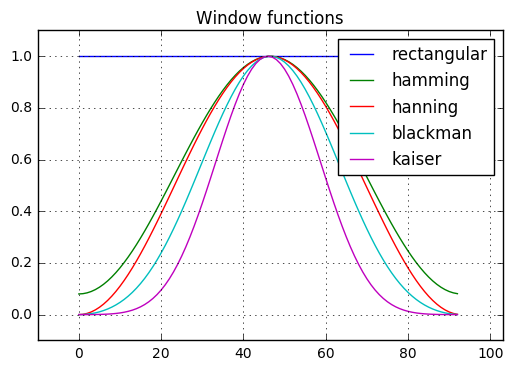

In [3]:
plt.title('Window functions')
plt.xlim([-10, window_size + 10])
plt.ylim([-0.1, 1.1])
plt.plot(rectangular(window_size))
plt.plot(hamming(window_size))
plt.plot(hanning(window_size))
plt.plot(blackman(window_size))
plt.plot(kaiser(window_size, 14))
plt.legend(('rectangular', 'hamming', 'hanning', 'blackman', 'kaiser'))
plt.grid()


Compute and plot magnitude spectrum on a dB scale of each window. Use FFT size $N=512$. What can you say about rectangular window?

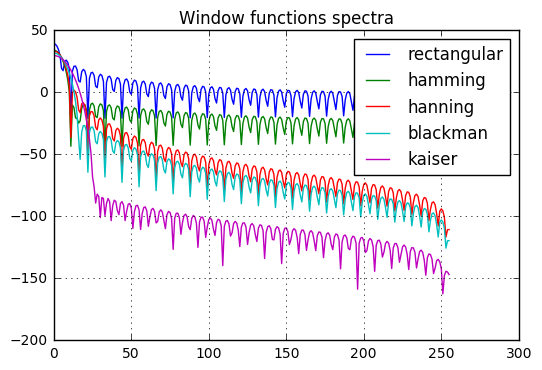

In [4]:
# plot spectra on decibel scale (20*log10(x))

plt.title('Window functions spectra')

rect_spec = np.abs(np.fft.fft(rectangular(window_size), fft_size))
plt.plot(20 * np.log10(rect_spec[:fft_size//2]))

hamming_spec = np.abs(np.fft.fft(hamming(window_size), fft_size))
plt.plot(20 * np.log10(hamming_spec[:fft_size//2]))

hanning_spec = np.abs(np.fft.fft(hanning(window_size), fft_size))
plt.plot(20 * np.log10(hanning_spec[:fft_size//2]))

blackman_spec = np.abs(np.fft.fft(blackman(window_size), fft_size))
plt.plot(20 * np.log10(blackman_spec[:fft_size//2]))

kaiser_spec = np.abs(np.fft.fft(kaiser(window_size, 14), fft_size))
plt.plot(20 * np.log10(kaiser_spec[:fft_size//2]))

plt.legend(('rectangular', 'hamming', 'hanning', 'blackman', 'kaiser'))
plt.grid()
